In [10]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# Perovskite_Stability_with_features.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('D://DATA//Kaggle dataset//Perovskite_Stability_with_features.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'Perovskite_Stability_with_features.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 81 columns


In [4]:
df1.head(5)

,Material Composition,A site #1,A site #2,A site #3,B site #1,B site #2,B site #3,X site,Number of elements,energy_above_hull (meV/atom),...,host_Asite0_IsBCC,host_Asite0_IsCubic,host_Asite0_IsAlkali,host_Asite0_OrbitalD,host_Asite0_NsValence,host_Bsite0_At. #,host_Bsite0_IsHexagonal,host_Bsite0_IsNoblegas,Asite_IsAlkali_max,Bsite_IsMetal_max
0,Ba1Sr7V8O24,Ba,Sr,NaN,V,NaN,NaN,O,4,29.747707,...,0,0,0,0,2,23,0,0,1,1
1,Ba2Bi2Pr4Co8O24,Ba,Bi,Pr,Co,NaN,NaN,O,5,106.702335,...,0,0,0,0,2,27,1,0,1,1
2,Ba2Ca6Fe8O24,Ba,Ca,NaN,Fe,NaN,NaN,O,4,171.608093,...,0,0,0,0,2,26,0,0,1,1
3,Ba2Cd2Pr4Ni8O24,Ba,Cd,Pr,Ni,NaN,NaN,O,5,284.898190,...,0,0,0,0,2,28,0,0,1,1
4,Ba2Dy6Fe8O24,Ba,Dy,NaN,Fe,NaN,NaN,O,4,270.007913,...,0,0,0,0,2,26,0,0,1,1


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 81 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Material Composition                                 1000 non-null   object 
 1   A site #1                                            1000 non-null   object 
 2   A site #2                                            644 non-null    object 
 3   A site #3                                            30 non-null     object 
 4   B site #1                                            1000 non-null   object 
 5   B site #2                                            609 non-null    object 
 6   B site #3                                            33 non-null     object 
 7   X site                                               1000 non-null   object 
 8   Number of elements                                   1000 non-null   

In [11]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]]
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = math.ceil((nCol + nGraphPerRow - 1) / nGraphPerRow)  # Use math.ceil to round up
    plt.figure(num=None, figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if not np.issubdtype(type(columnDf.iloc[0]), np.number):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

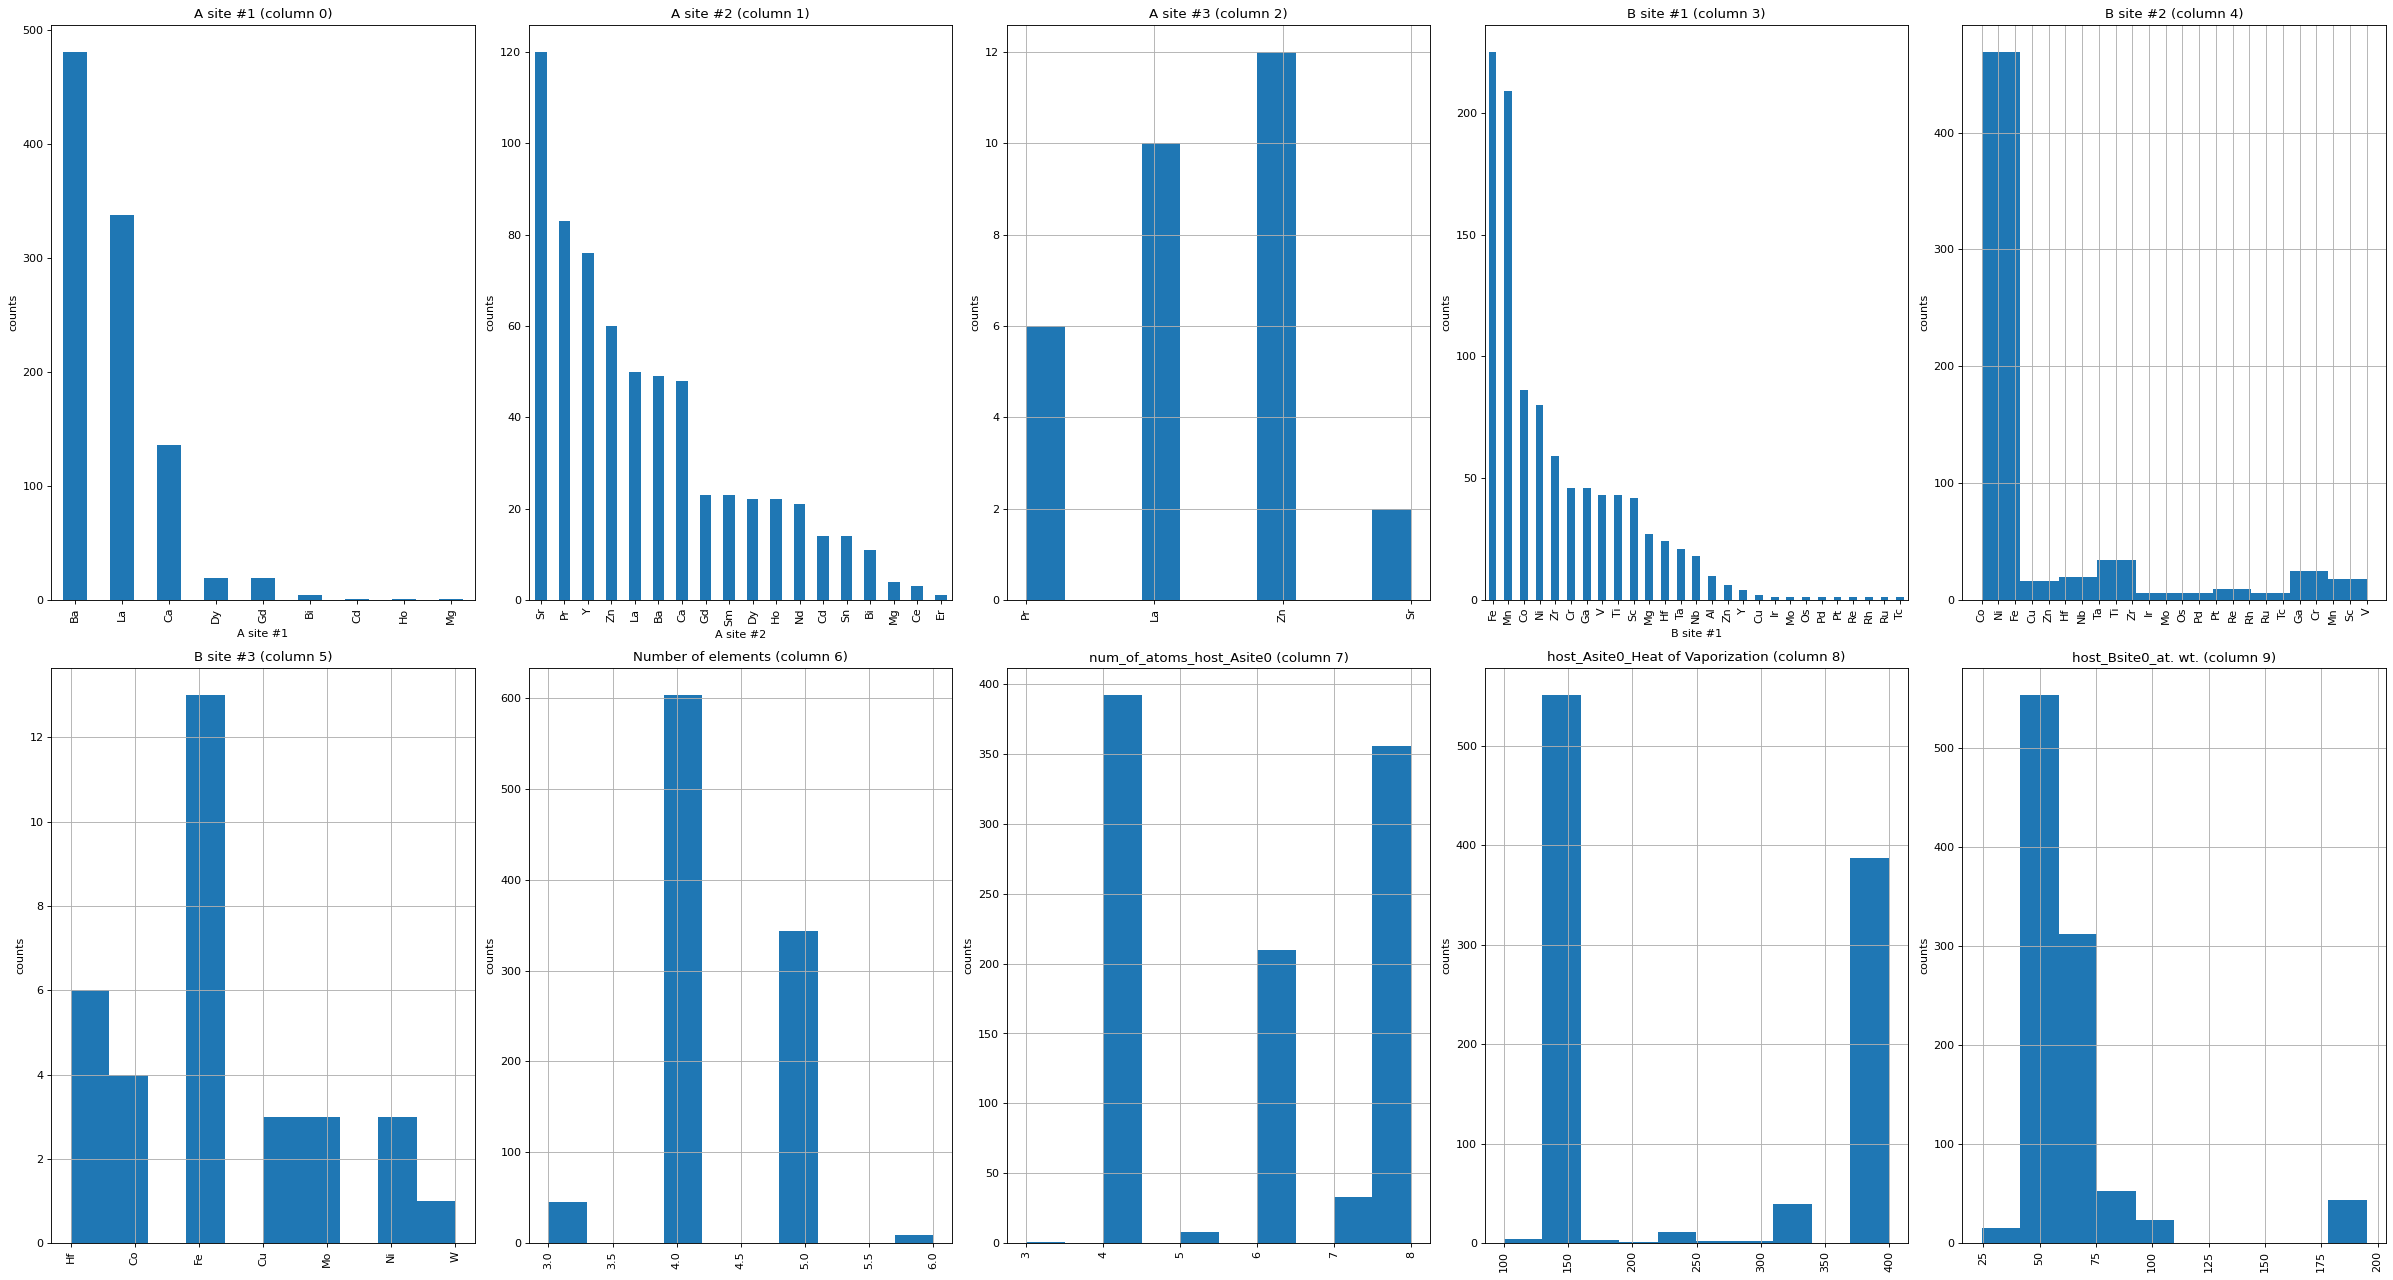

In [12]:
plotPerColumnDistribution(df1, 10, 5)

In [18]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    # Exclude non-numeric columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    df = df[numeric_cols]
    df = df.dropna(axis='columns')  # Drop columns with NaN values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum=1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()




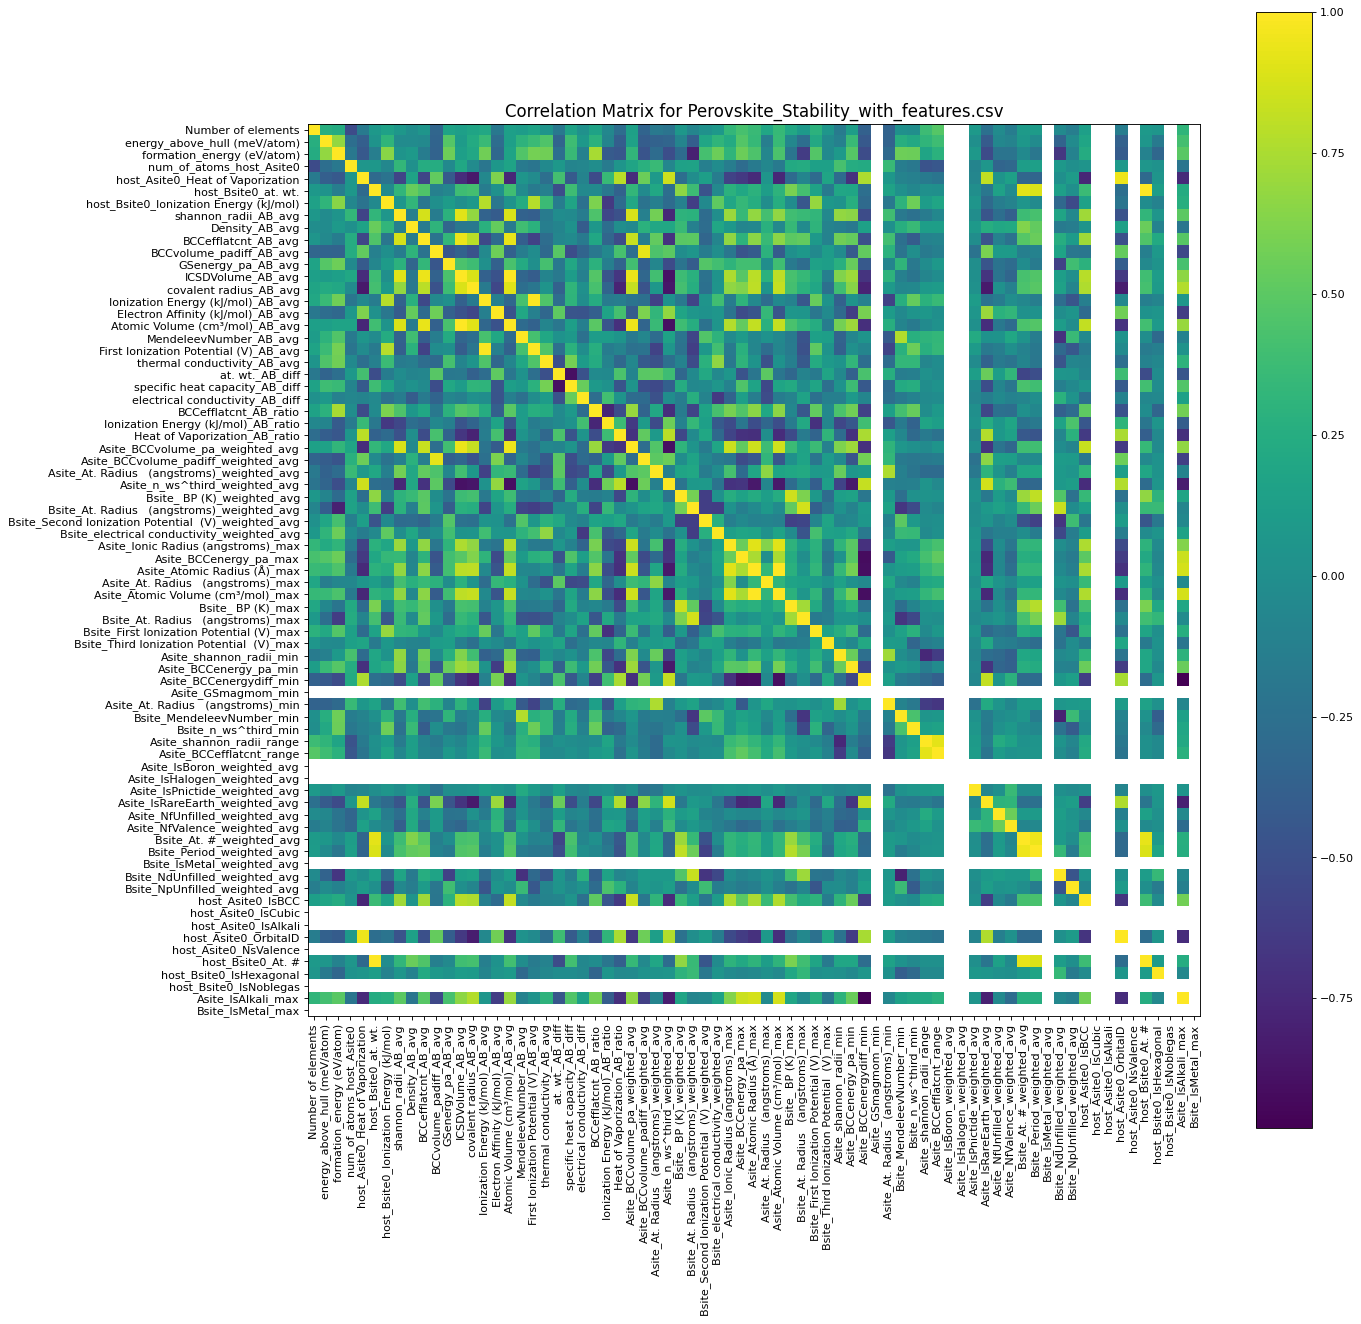

In [19]:
plotCorrelationMatrix(df1, 18)

In [22]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna(axis = 'columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


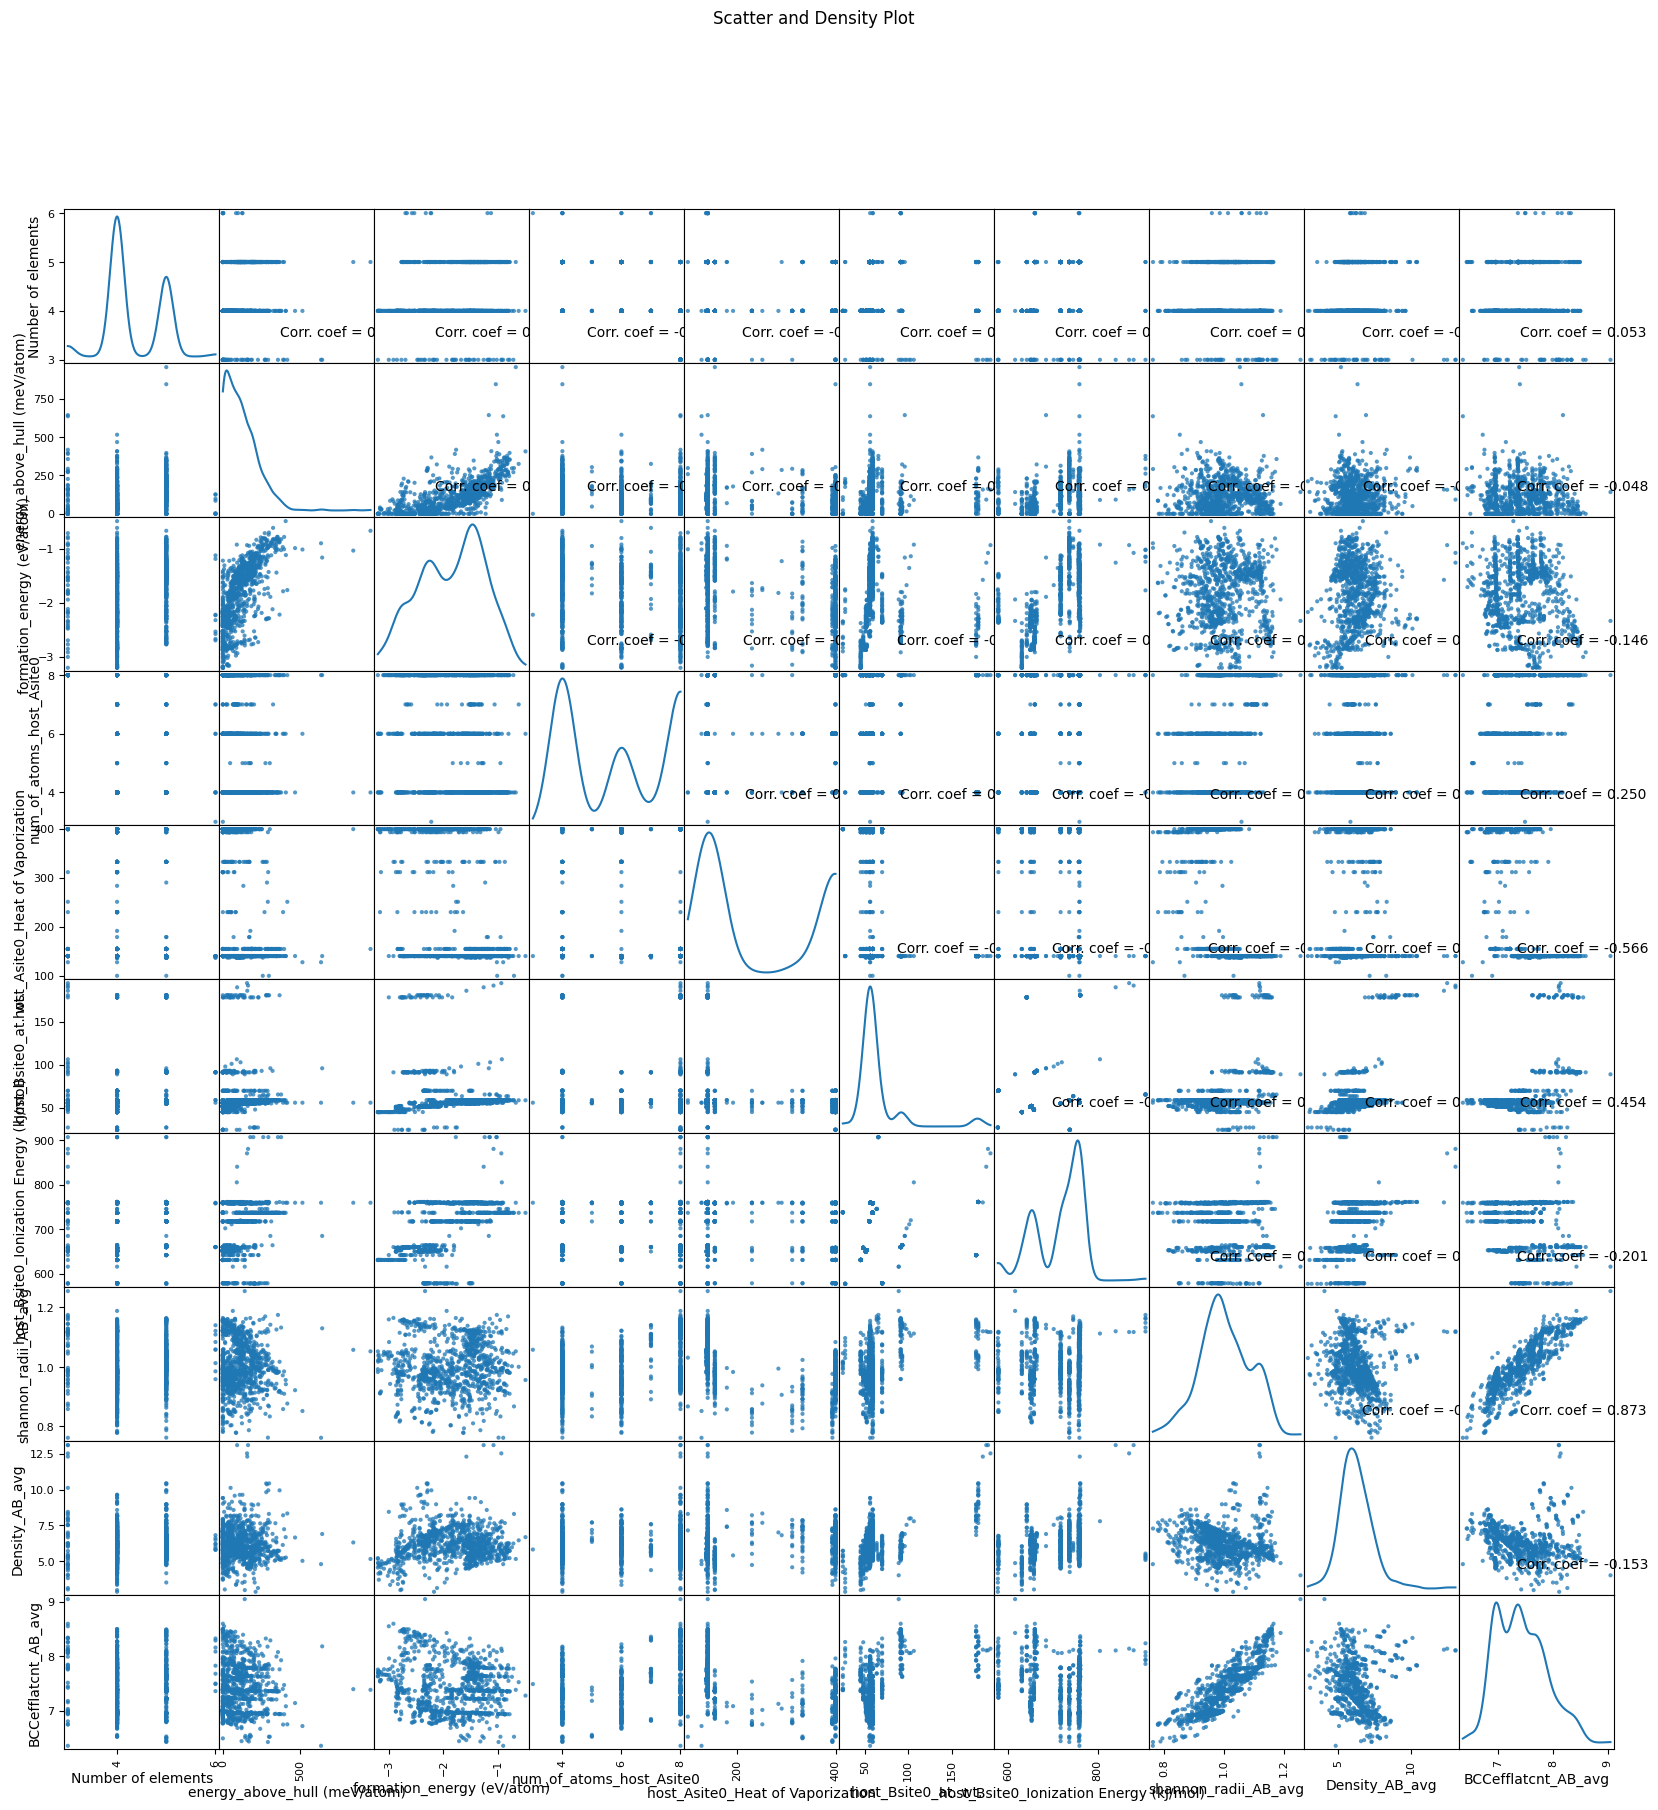

In [23]:
plotScatterMatrix(df1, 20, 10)